In [1]:
# 필요한 패키지 설치
!pip install plotly
!pip install pywaffle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from pywaffle import Waffle
plt.rcParams['figure.dpi'] = 300

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 18.4 MB/s eta 0:00:0000:0100:01
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 37.2 MB/s eta 0:00:0000:0100:01


In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/sewonghwang/six-countries-height-samples
df = pd.read_csv("datasets/six_countries_height_samples.csv")

# 데이터 샘플 확인
df.head()

,id,country,sex,height_cm
0,rhop00001,AUSTRALIA,man,189
1,rhop00002,AUSTRALIA,man,165
2,rhop00003,AUSTRALIA,man,189
3,rhop00004,AUSTRALIA,man,164
4,rhop00005,AUSTRALIA,man,192


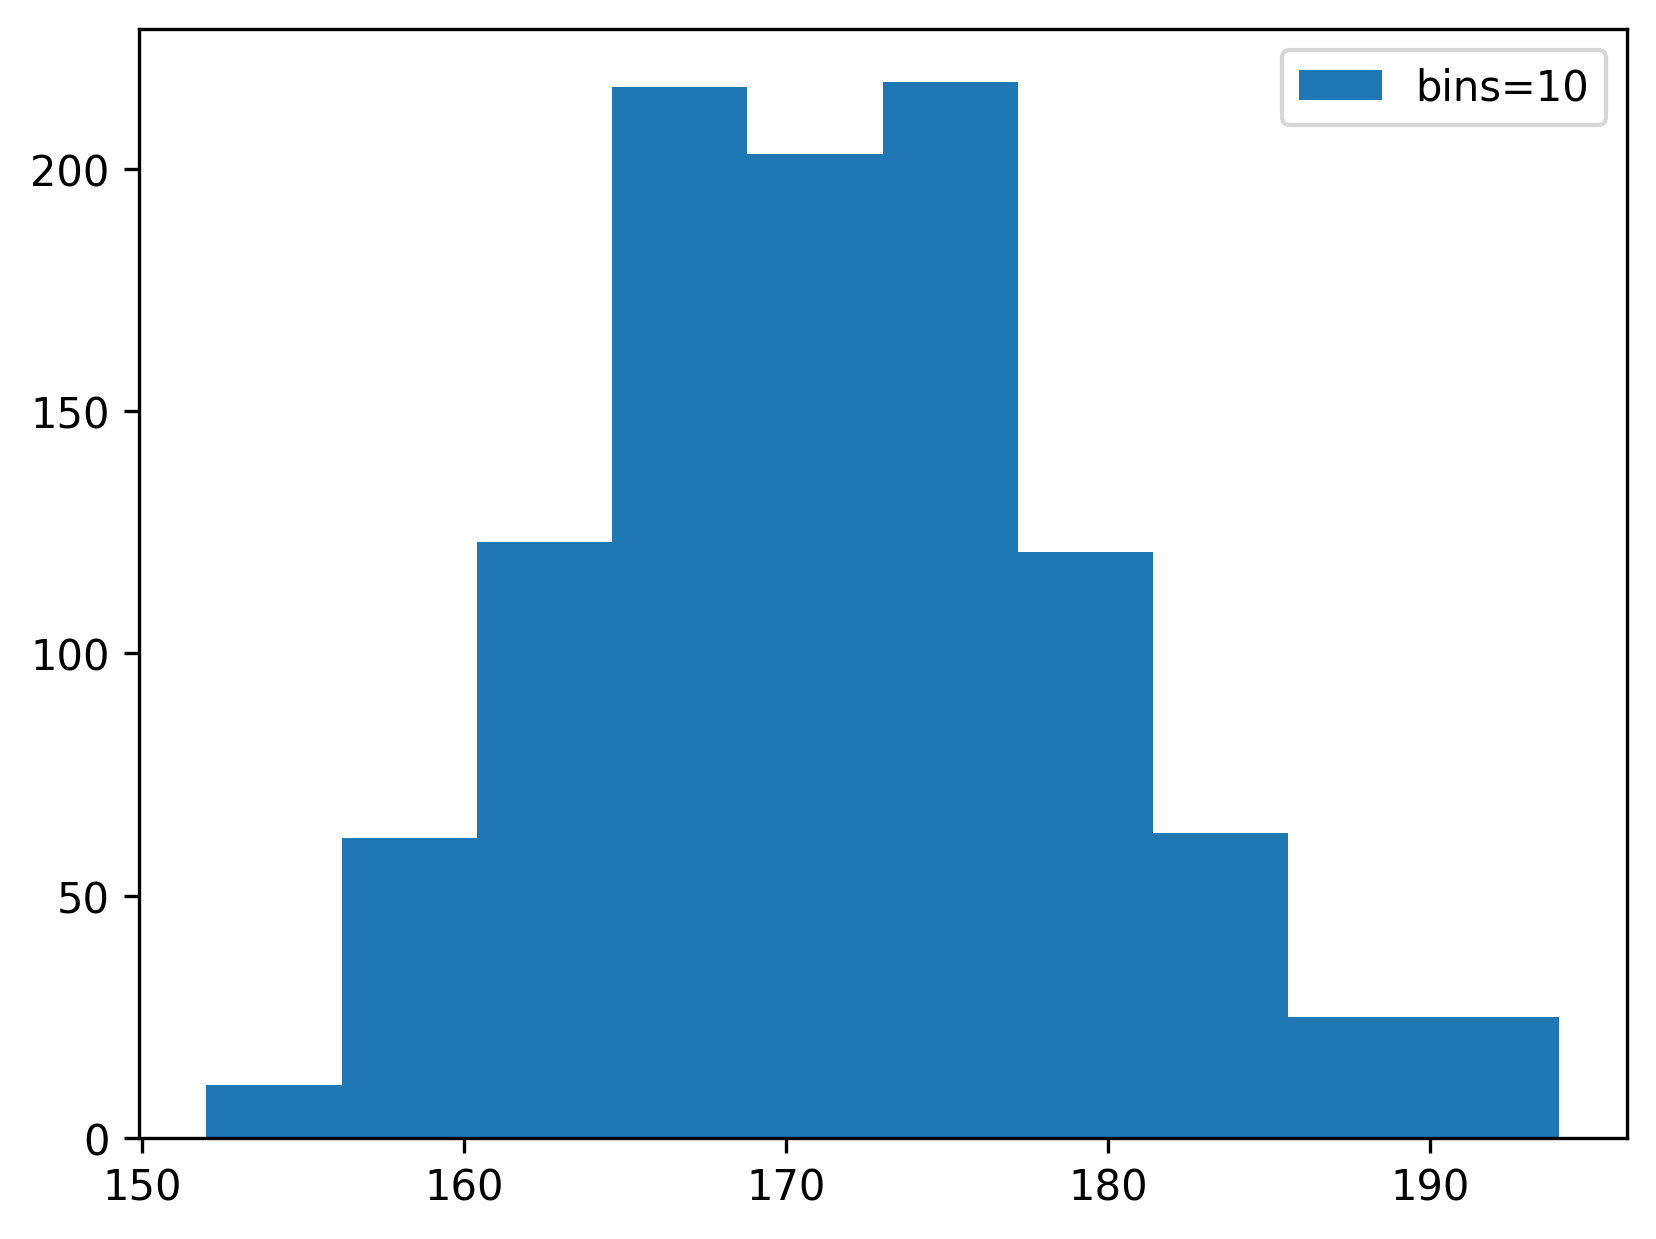

In [3]:
# 기본 히스토그램 시각화

#  신장 컬럼만 필터링
df1 = df[['height_cm']]

# 10cm 단위로 히스토그램 시각화
plt.hist(df1, bins=10, label='bins=10')
plt.legend()
plt.show()

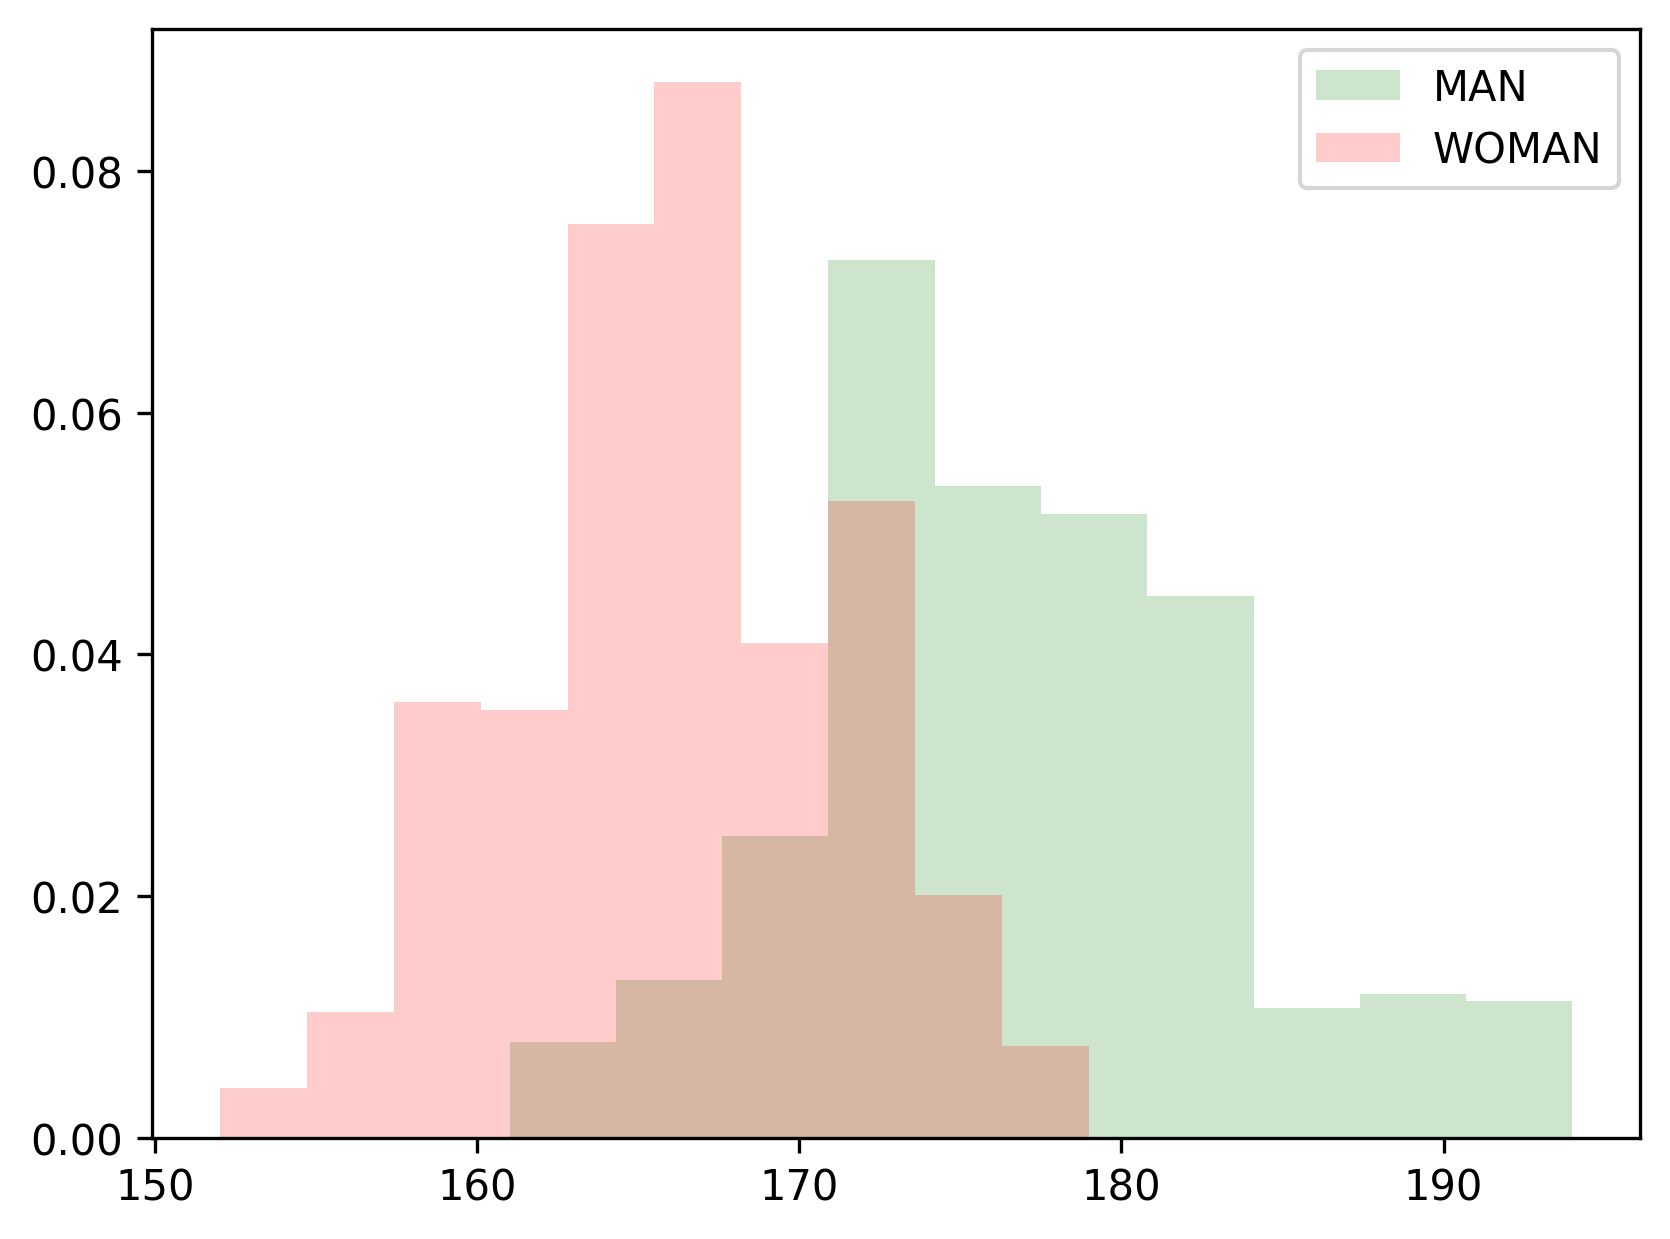

In [4]:
# 남성 여성 히스토그램 시각화

#  남성 여성 별도 데이터셋 생성
df1_1 = df[df['sex'].isin(['man'])]
df1_1 = df1_1[['height_cm']]
df1_2 = df[df['sex'].isin(['woman'])]
df1_2 = df1_2[['height_cm']]

# 10cm 단위로 남성, 여성 신장 히스토그램 시각화
plt.hist(df1_1, color = 'green', alpha = 0.2, bins = 10, label = 'MAN', density = True)
plt.hist(df1_2, color = 'red', alpha = 0.2, bins = 10, label = 'WOMAN', density = True)
plt.legend()
plt.show()

In [5]:
# 파이차트, 도넛차트 시각화를 위한 데이터 전처리

df2 = df[['country','height_cm']]
# 키 175 이상만 추출
df2=df2[df.height_cm >= 175]
df2 = df2.groupby('country').count().reset_index()

df2.head(10)

,country,height_cm
0,AUSTRALIA,68
1,DENMARK,59
2,ITALY,67
3,JAPAN,46
4,KOREA,52
5,TURKEY,61


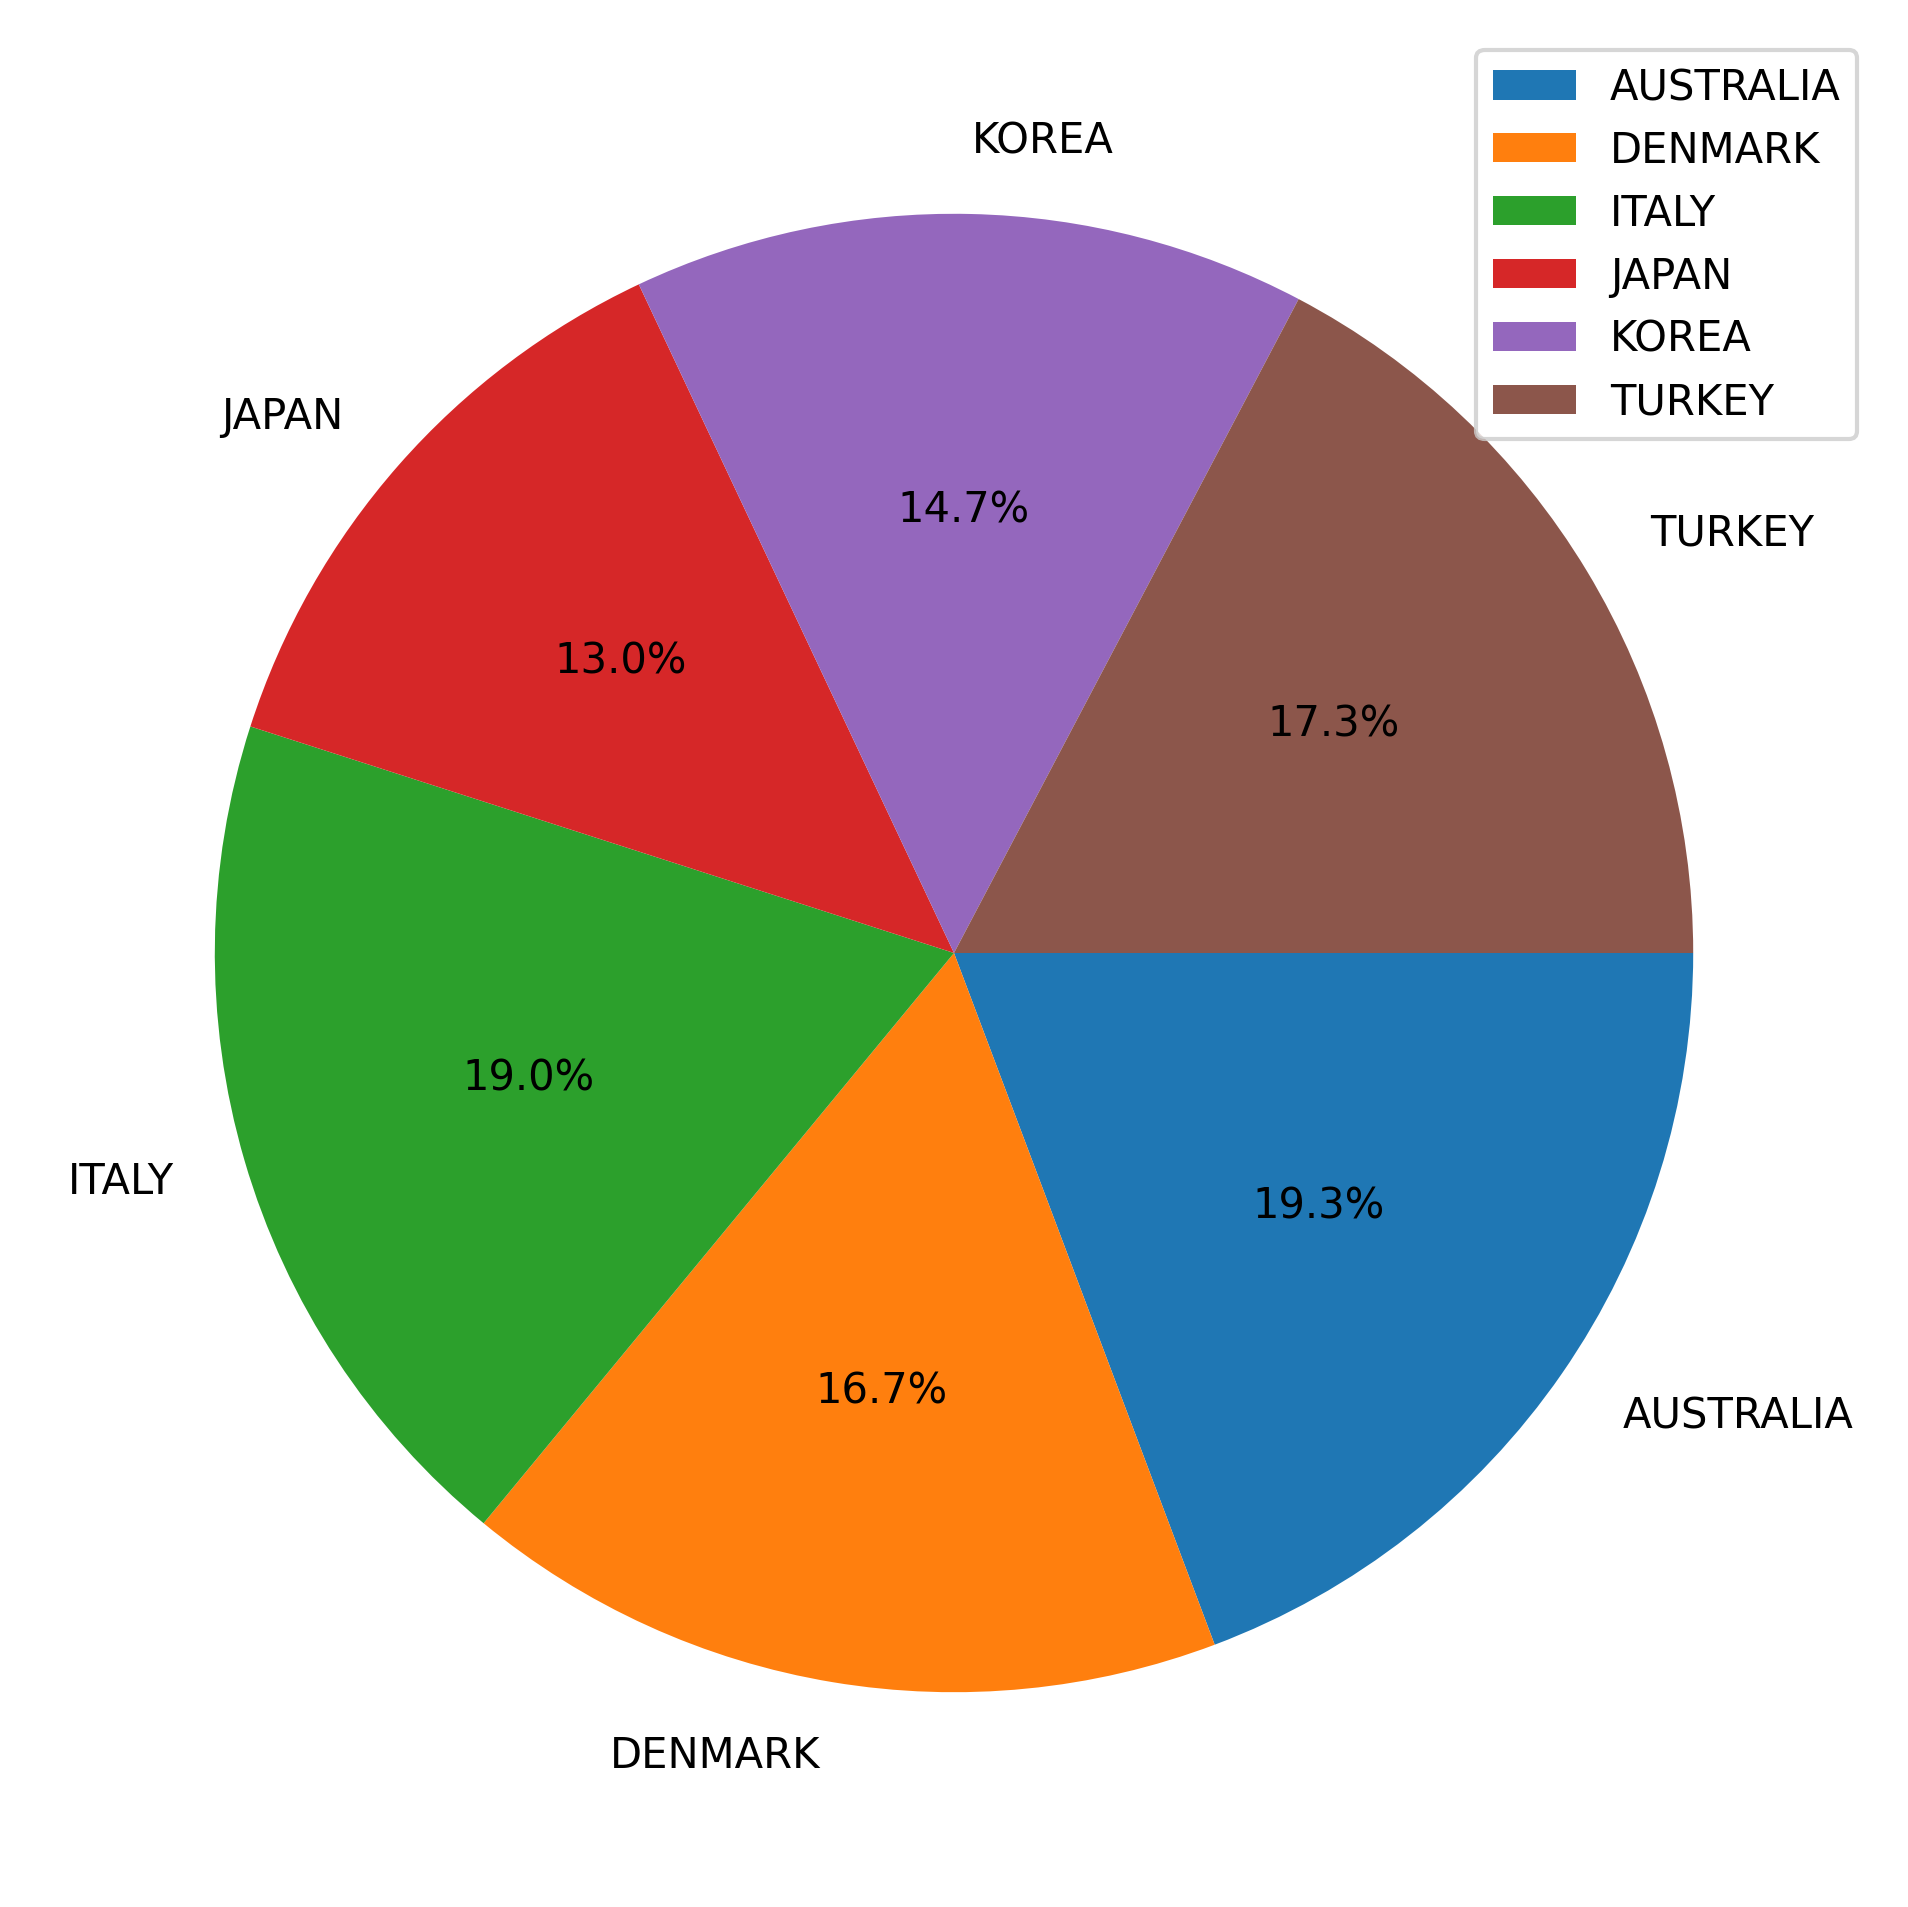

In [6]:
# 파이차트 시각화

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색 설정
ax = fig.add_subplot() # 프레임 생성

# 파이차트 출력
ax.pie(df2.height_cm, 
       labels=df2.country, # 라벨 출력
       startangle=0, # 시작점 degree 설정
       counterclock=False, # 시계 방향
       autopct=lambda p : '{:.1f}%'.format(p) # 퍼센자릿수 설정
       )

plt.legend() # 범례 표시
plt.show()

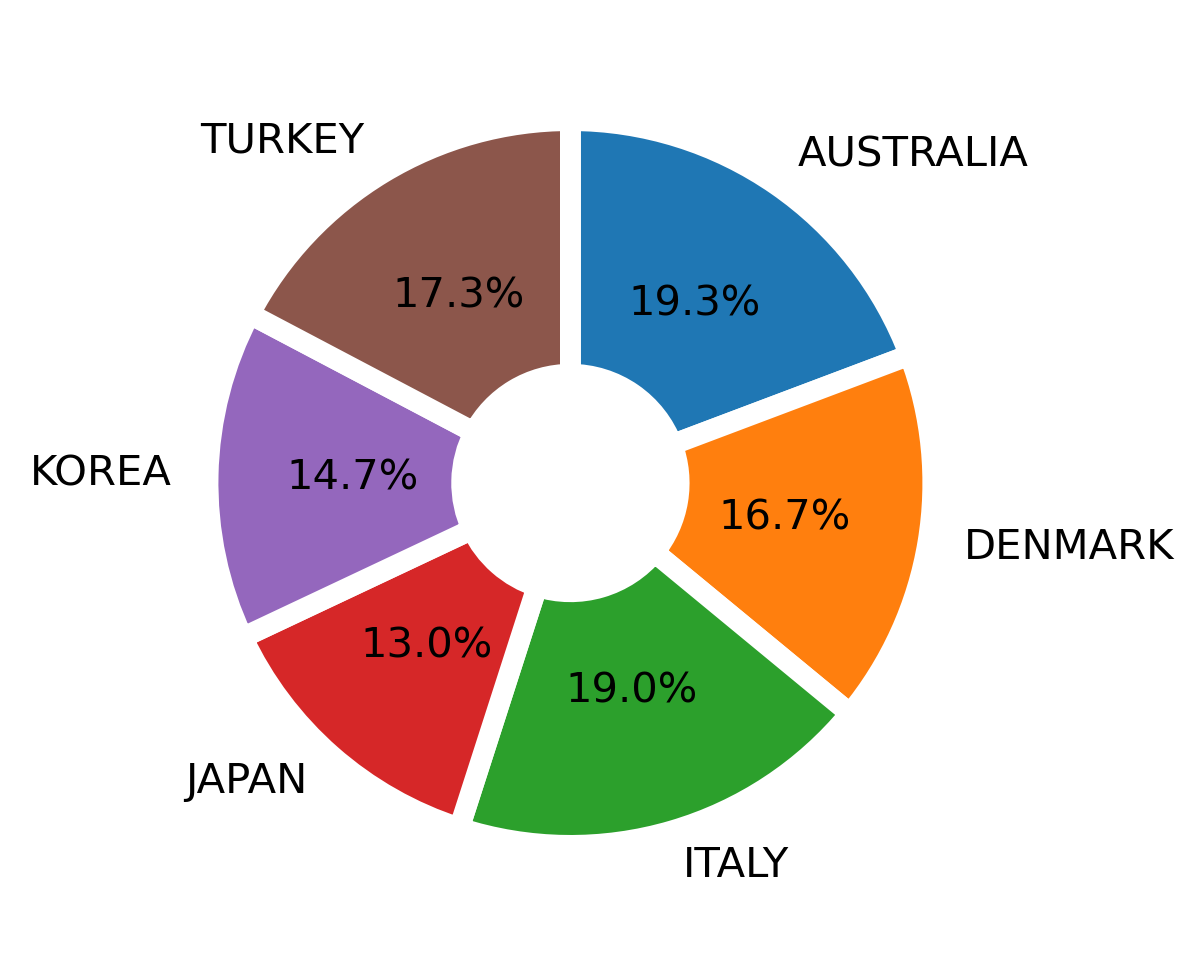

In [7]:
# 도넛차트 시각화

# 차트 형태 옵션 설정
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df2.height_cm, labels=df2.country, autopct='%.1f%%', 
        startangle=90, counterclock=False, wedgeprops=wedgeprops)
plt.show()

In [8]:
# 트리맵 차트용 데이터셋 전처리

df3 = df[['country', 'sex', 'height_cm']]
df3=df3[df.height_cm >= 175]
# 국가, 성별 단위 신장 175cm 이상 카운팅
df3 = df3.groupby(['country','sex']).count().reset_index()

df3.head(10)

,country,sex,height_cm
0,AUSTRALIA,man,59
1,AUSTRALIA,woman,9
2,DENMARK,man,53
3,DENMARK,woman,6
4,ITALY,man,60
5,ITALY,woman,7
6,JAPAN,man,45
7,JAPAN,woman,1
8,KOREA,man,50
9,KOREA,woman,2


In [10]:
# 트리맵 차트 시각화

fig = px.treemap(df3,
                 path=['sex','country'],
                 values='height_cm',
                 color='height_cm',
                 color_continuous_scale='viridis')

fig.show()

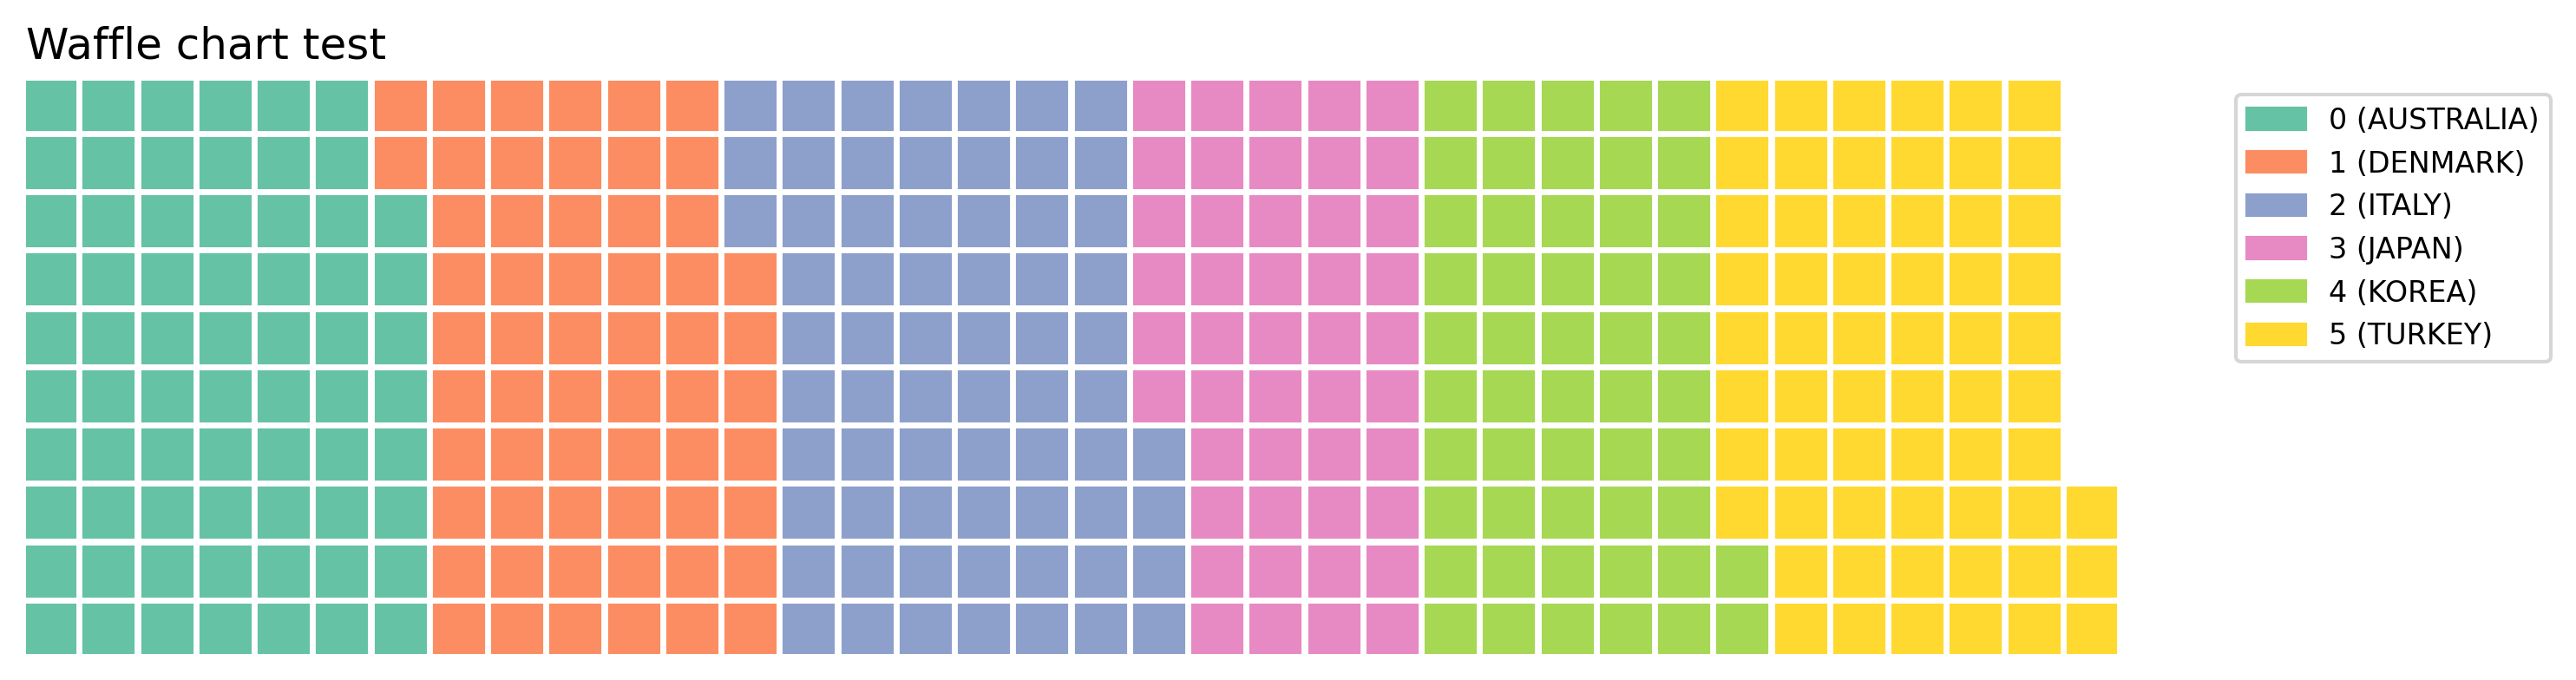

In [11]:
# 와플차트 시각화

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {
            'values': df2['height_cm'],
            'labels': ["{0} ({1})".format(n, v) for n, v in df2['country'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Waffle chart test', 'loc': 'left'}
        }
    },
    rows=10,
    figsize=(10, 10) 
)